<a href="https://colab.research.google.com/github/carlostamayo636/cd_202202_Carlos_Tamayo/blob/main/taller_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyproj
!pip install cython
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 24.5 MB

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

import pandas as pd
import pyproj

In [3]:
!apt-get install nvidia-cuda-toolkit
!pip3 install numba

import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/lib/nvidia-cuda-toolkit/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/lib/x86_64-linux-gnu/libnvvm.so"

from numba import cuda
import numpy as np
import time

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-6 fonts-dejavu-core fonts-dejavu-extra g++-6 gcc-6 gcc-6-base
  libaccinj64-9.1 libasan3 libatk-wrapper-java libatk-wrapper-java-jni
  libcublas9.1 libcudart9.1 libcufft9.1 libcufftw9.1 libcuinj64-9.1
  libcurand9.1 libcusolver9.1 libcusparse9.1 libgail-common libgail18
  libgcc-6-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libnppc9.1
  libnppial9.1 libnppicc9.1 libnppicom9.1 libnppidei9.1 libnppif9.1
  libnppig9.1 libnppim9.1 libnppist9.1 libnppisu9.1 libnppitc9.1 libnpps9.1
  libnvblas9.1 libnvgraph9.1 libnvrtc9.1 libnvtoolsext1 libnvvm3
  libstdc++-6-dev libthrust-dev libvdpau-dev libxxf86dga1 nvidia-cuda-dev
  nvidia-cuda-doc nvidia-cuda-gdb nvidia-profiler nvidia-visual-profiler
  openjdk-8-jr

In [4]:
import math

from pyproj import Geod
from shapely import wkt

import random
from shapely.geometry import Point
import matplotlib.path as mpltPath
import multiprocessing

import time

In [5]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [6]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [7]:
print(df['x'].mean())
print(df['y'].mean())

#Función K de Ripley
h = 100


710379.5826398408
782763.2617568913


In [8]:
import urllib.request

url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

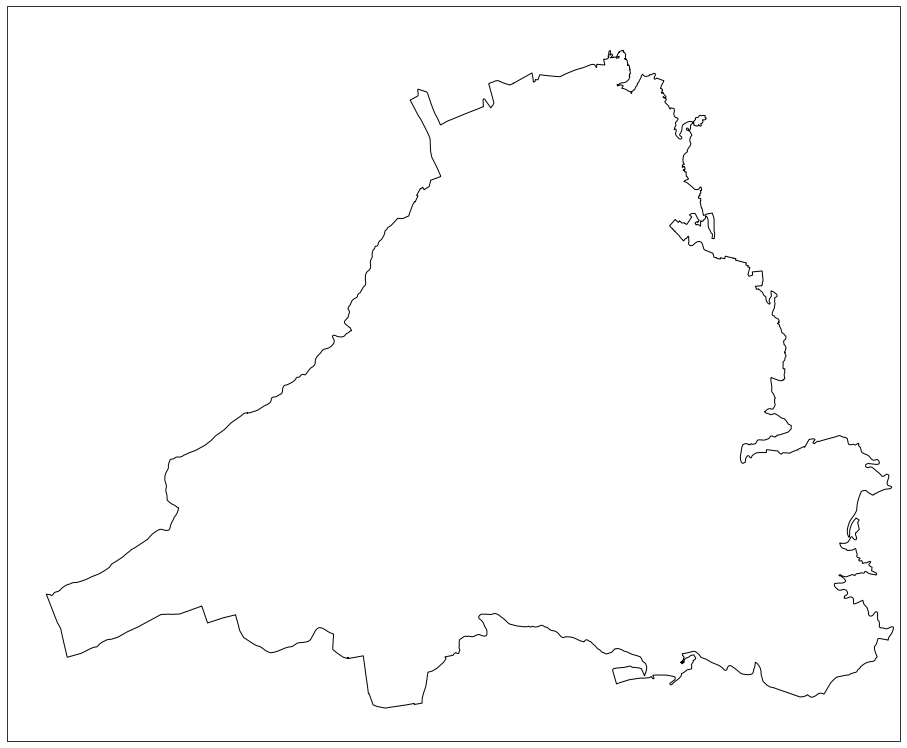

In [9]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.135 #min(df['longitud'])
upper_lon = -73.073 #max(df['longitud'])
lower_lat = 7.051 #min(df['latitud'])
upper_lat = 7.102 #max(df['latitud'])

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for urbano in reader.geometries():
    ax.add_geometries([urbano], ccrs.PlateCarree(), facecolor='white', edgecolor='black')
    #print(urbano)

ax.add_line
plt.show()

In [10]:
polyMap = ""
for x in reader.geometries():
  polyMap = x

geod = Geod(ellps='WGS84')
poly = polyMap
points = np.array(poly)
print(points)

area = abs(geod.geometry_area_perimeter(poly)[0])
print(area)

POLYGON ((-73.07407285697673 7.069474056682395, -73.07406866523667 7.069476668313655, -73.07399633006656 7.069527112186506, -73.07394969302385 7.069546149035602, -73.07387259684282 7.069533775263551, -73.07384309188512 7.069512836348395, -73.07381739375768 7.069463343958205, -73.07380978009724 7.069370068973569, -73.07383928595425 7.069264421116202, -73.07391447557256 7.069024571027171, -73.07393256093889 7.068901791084841, -73.07391828330208 7.068836117193086, -73.07387735695443 7.068783768556102, -73.073835479124 7.068757118945939, -73.07371174590031 7.068719999428481, -73.07360990487319 7.068662891579208, -73.07362480574017 7.068626213628932, -73.07363233486433 7.068609649016139, -73.07364265188681 7.068586952825683, -73.07370073190322 7.068552104995717, -73.07371403557426 7.068544121713899, -73.07384609562075 7.06852984587573, -73.07385377043511 7.068528872809281, -73.07385384507887 7.068528863816084, -73.07409950928491 7.068497722991594, -73.07416574795087 7.068469656049842, -73.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  import sys


In [13]:
def distancia(x1, y1, x2, y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

# PC = puntos cercanos
# GP = Generar los puntos

def PC (pointList, h):
  counter = 0
  pointOneIndex = 0
  for pointOne in pointList:
    if(pointOneIndex +1 < len(pointList)):
      for pointTwo in pointList[pointOneIndex + 1:len(pointList)]:
        if (distancia(pointOne[0],pointOne[1],pointTwo[0],pointTwo[1]) <= h):
          counter += 1
    pointOneIndex += 1
  return counter

def valorK(puntos, area, h):
  return (area/(len(puntos)**2)) * PC(puntos,h)

def temp(number, otherNum):
  print(otherNum)
  print(number)

def GP(pointNumber, polygon):
  pointList = []
  for a in range(pointNumber):
    x = 0
    y = 0
    while (polygon.contains(Point(x, y)) == False): 
      x = random.uniform(lower_lon, upper_lon)
      y = random.uniform(lower_lat, upper_lat)
    pointList.append(list(P(x, y)))
  return pointList

In [16]:
# KC = K completo
# IK = Iterar K

def kC(originalPointList, ranList, h):
  
  result = []
  originalK = valorK(originalPointList, area, h)
  result.append(originalK)

  totalPoints = len(originalPointList)
  for randSet in ranList:
    result.append(valorK(randSet, area, h))
  result.sort()
  return [h, originalK, np.percentile(result, 2.5), np.percentile(result, 97.5)]

def IK(originalPointList):
  result = []
  randList = []
  totalPoints = len(originalPointList)
  for i in range(999):
    print("\rDatos Aleatorios = " + str(i + 1), end='', flush=True)
    
    #ye = generadorPuntos(totalPoints,poly)
    randList.append(GP(totalPoints,poly))
  print()
  for i in range(5,100,5):
    start_time = time.time()
    
    result.append(kC(originalPointList, randList, i))
    print(str(i) + " - " + str(time.time()-start_time))
  return result

x_points = df['x']
y_points = df['y']
pointList = []
for index in range(len(x_points)):
  pointList.append([x_points[index], y_points[index]])


In [17]:
# Prueba con 99 resultados, tambien sirve con 999 pero se demora mucho
finalData = IK(pointList)

Datos Aleatorios = 99
5 - 38.444600343704224
10 - 40.38206720352173
15 - 38.59371852874756
20 - 38.65631151199341
25 - 42.24662733078003
30 - 38.72631502151489
35 - 38.68826365470886
40 - 38.79321765899658
45 - 38.71239972114563
50 - 42.280970096588135
55 - 38.87696361541748
60 - 38.87872266769409
65 - 38.68088507652283
70 - 42.183858156204224
75 - 38.82870030403137
80 - 38.787962436676025
85 - 38.82943940162659
90 - 40.87035369873047
95 - 42.46413803100586
